In [1]:
from IPython.core.display import display_html
from urllib.request import urlopen

display_html(urlopen('http://bit.ly/1HflmO9').read(), raw=True)

# Filtro de suavizado

## El problema

Queremos recuperar una imagen corrupta, es decir, una imagen que a traves de un proceso desconocido, perdió información.

Pero como te puedes imaginar la información simplemente no es recuperable de la nada, en esta ocasión intentaremos recuperar algo de la definición de la imagen tratando de minimizar los bordes visibles en imagen, es decir suavizarla.

Empecemos primero por mostrar nuestra imagen:

In [1]:
# Se importan funciones para graficar y se inicializa con graficas en linea
%matplotlib inline
from matplotlib.pyplot import imshow, cm, figure

In [2]:
# Se importa funcion para cargar imagenes
from scipy.ndimage import imread

In [3]:
# Se guardan las rutas a los archivos en variables para facil acceso
correcta = "imagenes/stones.jpg"
corrupta = "imagenes/stones_c.jpg"

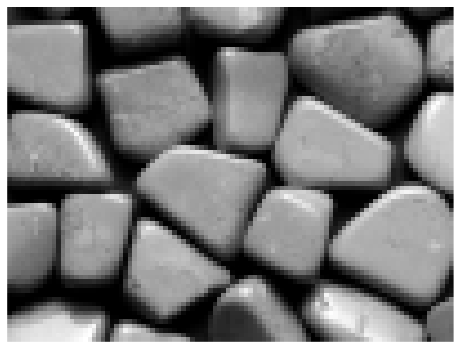

In [4]:
# Se lee la imagen del archivo a una variable de python y se grafica
im_corrupta = imread(corrupta)

f  = figure(figsize=(8,6))
ax = imshow(im_corrupta, cmap=cm.gray, interpolation='none');

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["right"].set_color("none")
ax.axes.spines["left"].set_color("none")
ax.axes.spines["top"].set_color("none")
ax.axes.spines["bottom"].set_color("none")

Como podemos ver la imagen a perdido definición al utilizar un metodo de compresión muy ingenuo, el cual simplemente repite la misma información una y otra vez, tomemos una muestra de los datos para ilustrar esto mejor:

In [5]:
tamano_muestra = 12
muestra = im_corrupta[0:tamano_muestra, 0:tamano_muestra]
muestra

array([[44, 44, 44, 44, 33, 33, 33, 33, 17, 17, 17, 17],
       [44, 44, 44, 44, 33, 33, 33, 33, 17, 17, 17, 17],
       [44, 44, 44, 44, 33, 33, 33, 33, 17, 17, 17, 17],
       [44, 44, 44, 44, 33, 33, 33, 33, 17, 17, 17, 17],
       [43, 43, 43, 43, 34, 34, 34, 34, 20, 20, 20, 20],
       [43, 43, 43, 43, 34, 34, 34, 34, 20, 20, 20, 20],
       [43, 43, 43, 43, 34, 34, 34, 34, 20, 20, 20, 20],
       [43, 43, 43, 43, 34, 34, 34, 34, 20, 20, 20, 20],
       [45, 45, 45, 45, 34, 34, 34, 34, 26, 26, 26, 26],
       [45, 45, 45, 45, 34, 34, 34, 34, 26, 26, 26, 26],
       [45, 45, 45, 45, 34, 34, 34, 34, 26, 26, 26, 26],
       [45, 45, 45, 45, 34, 34, 34, 34, 26, 26, 26, 26]], dtype=uint8)

Lo cual graficamente se ve:

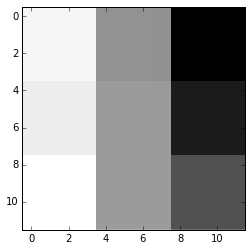

In [6]:
imshow(muestra, cmap=cm.gray, interpolation='none');

## La solución

Muy bien, es momento de pensar!

Si lo que queremos es **minimizar** las *diferencias* entre dos valores contiguos, es decir

$$
x_{(i+1)j} - x_{ij}
$$

podemos empezar restandolos y ver que pasa:

In [7]:
from numpy import matrix, eye, array

In [8]:
# Creamos una matriz identidad y la trasladamos para obtener el valor de la celda
# contigua derecha
I = eye(tamano_muestra, dtype=int).tolist()
# Agregamos un vector cero, por el momento
ceros = [0 for i in range(tamano_muestra)]
id_trasladada = matrix(array(I[1:tamano_muestra] + [ceros]))
id_trasladada

matrix([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [9]:
muestra_rest = matrix(muestra) * id_trasladada - matrix(muestra)
muestra_rest

matrix([[-44,   0,   0,   0,  11,   0,   0,   0,  16,   0,   0,   0],
        [-44,   0,   0,   0,  11,   0,   0,   0,  16,   0,   0,   0],
        [-44,   0,   0,   0,  11,   0,   0,   0,  16,   0,   0,   0],
        [-44,   0,   0,   0,  11,   0,   0,   0,  16,   0,   0,   0],
        [-43,   0,   0,   0,   9,   0,   0,   0,  14,   0,   0,   0],
        [-43,   0,   0,   0,   9,   0,   0,   0,  14,   0,   0,   0],
        [-43,   0,   0,   0,   9,   0,   0,   0,  14,   0,   0,   0],
        [-43,   0,   0,   0,   9,   0,   0,   0,  14,   0,   0,   0],
        [-45,   0,   0,   0,  11,   0,   0,   0,   8,   0,   0,   0],
        [-45,   0,   0,   0,  11,   0,   0,   0,   8,   0,   0,   0],
        [-45,   0,   0,   0,  11,   0,   0,   0,   8,   0,   0,   0],
        [-45,   0,   0,   0,  11,   0,   0,   0,   8,   0,   0,   0]])

Esta matriz nos muestra la diferencia con el elemento contiguo, si lo analizamos graficamente:

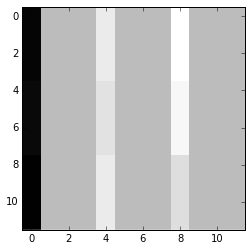

In [10]:
imshow(muestra_rest, cmap=cm.gray, interpolation='none');

podemos ver que solo hay diferencia entre los conjuntos de pixeles de la imagen que fueron eliminados.

Ahora, el punto es minimizar estas diferencias segun un factor de desempeño, y como pudiste notar en el ejemplo, pueden haber valores negativos, por lo que una buena idea es hacer el factor de desempeño un factor cuadratico:

$$
\left|\left| x_{(i+1)j} - x_{ij} \right|\right|^2
$$

y utilizando la forma matricial, que honestamente es mucho mas util en el caso de estas imagenes, nos queda:

$$
\left|\left| X (I_t - I) \right|\right|^2 = \left|\left| X D_1 \right|\right|^2
$$

en donde:

$$
I =
\begin{pmatrix}
1 & 0 & 0 & \dots & 0 & 0 & 0 \\
0 & 1 & 0 & \dots & 0 & 0 & 0 \\
0 & 0 & 1 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \dots & 1 & 0 & 0 \\
0 & 0 & 0 & \dots & 0 & 1 & 0
\end{pmatrix}
$$

$$
I_t =
\begin{pmatrix}
0 & 1 & 0 & \dots & 0 & 0 & 0 \\
0 & 0 & 1 & \dots & 0 & 0 & 0 \\
0 & 0 & 0 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \dots & 0 & 1 & 0 \\
0 & 0 & 0 & \dots & 0 & 0 & 1
\end{pmatrix}
$$

y por lo tanto $D_1$ es de la forma:

$$
D_1 =
\begin{pmatrix}
-1 & 1 & 0 & \dots & 0 & 0 & 0 \\
0 & -1 & 1 & \dots & 0 & 0 & 0 \\
0 & 0 & -1 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \dots & -1 & 1 & 0 \\
0 & 0 & 0 & \dots & 0 & -1 & 1
\end{pmatrix}
$$

<div class="alert alert-error" style="margin: 10px">

Cabe mencionar que $I$ e $I_t$ no son matrices cuadradas, ya que tienen una columna mas, principalmente para ajustar el hecho de que la operación de resta es binaria y necesitamos hacer una operación por cada uno de las $n$ columnas, por lo que necesitaremos $n + 1$ operandos; sin embargo al obtener el factor cuadrado, nos quedará una matriz de las dimensiones adecuadas. 

</div>

Asi pues, este factor cuadrado, lo denotaremos por la función $f_1(X)$ de la siguiente manera:

$$
f_1(X) = \left|\left| X D_1 \right|\right|^2 = D_1^T X^T X D_1
$$

y de la misma manera obtendremos un operador para la diferencia entre los elementos contiguos verticalmente, el cual se verá:

$$
f_2(X) = \left|\left| D_2 X \right|\right|^2 = X^T D_2^T D_2 X
$$

en donde $D_2$ es de la forma:

$$
D_2 =
\begin{pmatrix}
-1 & 0 & 0 & \dots & 0 & 0 \\
1 & -1 & 0 & \dots & 0 & 0 \\
0 & 1 & -1 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & & \vdots & \vdots \\
0 & 0 & 0 & \dots & -1 & 0 \\
0 & 0 & 0 & \dots & 1 & -1 \\
0 & 0 & 0 & \dots & 0 & 1
\end{pmatrix}
$$

Asi pues, nuestro objetivo es minimizar la siguiente expresión:

$$
\min_{X \in \mathbb{R}^{n \times m}} f_1(X) + f_2(X)
$$

Sin embargo tenemos que considerar que una optimización perfecta nos llevaria al caso en que todos los valores son exactamente iguales, por lo que agregaremos un termino para penalizar una diferencia demasiado grande con la imagen a suavizar, el cual simplemente es la diferencia entre la imagen obtenida y la imagen corrupta:

$$
f_3(X) = \left|\left| X - X_C \right|\right|^2
$$

Por lo que nuestra expresión a minimizar se vuelve:

$$
\min_{X \in \mathbb{R}^{n \times m}} V(X) = \min_{X \in \mathbb{R}^{n \times m}} \delta \left( f_1(X) + f_2(X) \right) + f_3(X) \quad \delta > 0
$$

en donde $\delta$ es la ponderación que le damos al termino *suavizante*.

<div style="display:none">
  $\DeclareMathOperator{\trace}{tr}$
</div>

<div class="alert alert-error" style="margin: 10px">

Cabe hacer la aclaración de que hasta el momento hemos utilizado una norma matricial, normal, sin embargo ahora utilizaremos la norma de Frobenius, la cual se define como:

$$
f_1(X) = \left|\left| X D_1 \right|\right|_F^2 = \trace{(D_1^T X^T X D_1)}
$$

y esta nos provee una manera facil de calcular la forma cuadratica que queremos. Mas aún, esta $f_1(X) \in \mathbb{R}$, por lo que podemos usar los conceptos de calculo variacional que hemos aprendido.

</div>

Ahora empezamos a calcular el valor de estas funciones alrededor de $X$ con una variación $H$.

$$
\begin{align}
f_1(X + H) &= \trace{\left( D_1^T (X + H)^T (X + H) D_1 \right)} \\
&= \trace{\left( D_1^T (X^T + H^T) (X + H) D_1 \right)} \\
&= \trace{\left( D_1^T (X^T X + X^T H + H^T X + H^T H) D_1 \right)} \\
&= \trace{\left( D_1^T X^T X D_1 + D_1^T X^T H D_1 + D_1^T H^T X D_1 + D_1^T H^T H D_1 \right)} \\
&= \trace{\left( D_1^T X^T X D_1 \right)} + \trace{\left( D_1^T X^T H D_1 \right)} + \trace{\left( D_1^T H^T X D_1 \right)} + \trace{\left( D_1^T H^T H D_1 \right)} \\
\end{align}
$$

Aqui hacemos notar que el primer termino es $f_1(X) = \trace{\left( D_1^T X^T X D_1 \right)}$, el segundo y tercer termino son el mismo, ya que la traza es invariante ante la transposición y el ultimo termino es de orden superior,  $o\left(\left|\left|H\right|\right|_F\right)$.

<div class="alert alert-error" style="margin: 10px">

Recordemos que la variable con respecto a la que estamos haciendo estos calculos es la perturbación $H$, por lo que los terminos de orden superior estan relacionados a $H$ y no a $X$ la cual asumimos es nuestro optimo.

</div>

Si desarrollamos la expasión de la serie de Taylor alrededor de $X$ con una perturbación $H$, notaremos que los terminos que obtuvimos corresponden a los de esta expansión:

$$
f_1(X + H) = f_1(X) + f_1'(X) \cdot H + o\left(\left|\left| H \right|\right|_F\right)
$$

y por lo tanto:

$$
f_1'(X) \cdot H = 2 \trace{\left( D_1^T X^T H D_1 \right)}
$$

Si expandimos las otras dos funciones alrededor de X con una perturbación $H$, podremos ver que:

$$
f_2'(X) \cdot H = 2 \trace{\left( X^T D_2^T D_2 H \right)}
$$

$$
f_3'(X) \cdot H = 2 \trace{\left( \left( X - X_C \right)^T H \right)}
$$

Ahora, por superposición podemos asegurar que nuestro criterio de desempeño $V(X)$ tiene una derivada de la forma:

$$
\begin{align}
V'(X) \cdot H &= \left( f_1'(X) \cdot H + f_2'(X) \cdot H \right) \delta + f_3'(X) \cdot H \\
&= \left( 2 \trace{\left( D_1^T X^T H D_1 \right)} + 2 \trace{\left( X^T D_2^T D_2 H \right)} \right) \delta + 2 \trace{\left( \left( X - X_C \right)^T H \right)} \\
&= 2 \trace{\left[ \left( \left( D_1^T X^T H D_1 \right) + \left( X^T D_2^T D_2 H \right) \right) \delta + \left( X - X_C \right)^T H \right]}
\end{align}
$$

y al utilizar la condición de optimalidad de primer orden tenemos que:

$$
V'(X) \cdot H = 2 \trace{\left[ \left( \left( D_1^T X^T H D_1 \right) + \left( X^T D_2^T D_2 H \right) \right) \delta + \left( X - X_C \right)^T H \right]} = 0
$$

y al hacer manipulación algebraica, obtenemos que:

$$
\begin{align}
\trace{\left[ \left( \left( D_1^T X^T H D_1 \right) + \left( X^T D_2^T D_2 H \right) \right) \delta + \left( X - X_C \right)^T H \right]} &= 0 \\
\trace{\left[ \left( \left( D_1^T H^T X D_1 \right) + \left( H^T D_2^T D_2 X \right) \right) \delta + H^T \left( X - X_C \right) \right]} &= 0 \\
\trace{\left[ \left( \left( H^T X D_1 D_1^T \right) + \left( H^T D_2^T D_2 X \right) \right) \delta + H^T \left( X - X_C \right) \right]} &= 0 \\
\trace{\left[ H^T \left( X D_1 D_1^T + D_2^T D_2 X \right) \delta + \left( X - X_C \right) \right]} &= 0
\end{align}
$$

En este punto nos preguntamos, para que condiciones de perturbación queremos que nuestra condición de optimalidad se cumpla, por lo que si exigimos que esto se cumpla para toda $H$, tenemos que:

$$
\left( X D_1 D_1^T + D_2^T D_2 X \right) \delta + \left( X - X_C \right) = 0
$$

lo cual implica que:

$$
X \delta D_1 D_1^T + ( \delta D_2^T D_2 + I) X = X_C
$$

lo cual tiene la forma de la ecuación de Lyapunov:

$$
A X + X B = Q
$$

en donde $A$ y $B$ son de la forma:

$$
A = \delta D_2^T D_2 + I \quad B = \delta D_1 D_1^T
$$

por lo que ya encontramos una forma de programar este algoritmo de suavizado, utilizando la función ```solve_sylvester``` proporcionada por el paquete Scipy.

Ahora regresemos a la programación; lo que tenemos que construir son las matrices $D_1$ y $D_2$ para incorporarlas a una función que calcule todo en linea.

Empecemos construyendo una de las filas de esta matriz. Recordemos que $D_1$ es de la forma:

$$
D_1 =
\begin{pmatrix}
-1 & 1 & 0 & \dots & 0 & 0 & 0 \\
0 & -1 & 1 & \dots & 0 & 0 & 0 \\
0 & 0 & -1 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \dots & -1 & 1 & 0 \\
0 & 0 & 0 & \dots & 0 & -1 & 1
\end{pmatrix}
$$

por lo que primero tenemos que construir un arreglo de la forma:

$$
\begin{pmatrix}
-1 & 1 & 0 & \dots & 0 & 0 & 0
\end{pmatrix}
$$

La siguiente función describe una manera **dificil** de conseguir esto, sin embargo para efectos de demostración servirá:

In [11]:
def fun(i, tot):
    '''Arreglo especial
    Esta funcion crea un arreglo de tamaño tot con un -1 en el elemento i y un
    1 en el elemento i+1, siendo los demas lugares del arreglo ceros:

     indice ->  0, 1, ..., i-1, i, i+1, i+2, ..., tot
    arreglo -> [0, 0, ...,   0, -1,  1,   0, ...,   0].

    Ejemplo
    -------
    >>> fun(3, 5)
    array([ 0,  0,  -1, 1,  0])
    '''

    # Se importan funciones necesarias
    from numpy import array

    # Se define el inicio del arreglo
    if i == 0:
        a = [-1]
        a.append(1)
    else:
        a = [0]

    # Se incluyen numeros restantes en el arreglo
    for t in range(tot - 1)[1:]:
        if i == t:
            a.append(-1)
            a.append(1)
        else:
            a.append(0)

    # Se convierte en arreglo de numpy el resultado
    return array(a)

Cuando mandamos llamar esta función para que nos de un arreglo de diez elementos, con el $-1$ en el segundo lugar, obtendremos:

In [12]:
fun(1, 10)

array([ 0, -1,  1,  0,  0,  0,  0,  0,  0,  0])

<div class="alert alert-error" style="margin: 10px">

Python lista los arreglos, y en general todas sus estructuras, empezando en ```0```, por lo que el indice ```1``` corresponde al segundo lugar.

</div>

Y ahora, utilizando una función especial de Python, crearemos un arreglo de arreglos, utilizando una sintaxis muy parecida a la de una definición matemática de la forma:

$$
\left\{ f(i) : i \in [0, 10] \right\}
$$

In [13]:
arreglo_de_arreglos = [fun(i, 11) for i in range(10)]
arreglo_de_arreglos

[array([-1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([ 0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([ 0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0]),
 array([ 0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0]),
 array([ 0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0]),
 array([ 0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0]),
 array([ 0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0]),
 array([ 0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0]),
 array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0]),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1])]

Esto se puede convertir facilmente en una matriz por medio de la instrucción ```matrix```.

In [14]:
matrix(arreglo_de_arreglos)

matrix([[-1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1]])

Por lo que estamos listos para juntar todos estos elementos en una función que ejecute todo este flujo de trabajo:

In [15]:
def suavizado_imagen(imagen_corrupta, delta):
    '''Suavizado de imagen
    
    Esta funcion toma la imagen especificada en la primer variable por su ruta, y
    le aplica un suavizado en proporcion al flotante pasado a la segunda variable.
    
    Ejemplo
    -------
    >>> suavizado_imagen("ruta/de/la/imagen.png", 0.1)
    '''
    
    # Se importan funciones necesarias
    from matplotlib.pyplot import imshow, cm, figure
    from scipy.linalg import solve_sylvester
    from scipy.ndimage import imread
    from numpy import matrix, eye, array
    
    # Se define funcion auxiliar para las filas de la matriz D
    def fun(i, tot):
        '''Arreglo especial
        Esta funcion crea un arreglo de tamaño tot con un -1 en el elemento i y un
        1 en el elemento i+1, siendo los demas lugares del arreglo ceros:
        
         indice ->  0, 1, ..., i-1, i, i+1, i+2, ..., tot
        arreglo -> [0, 0, ...,   0, -1,  1,   0, ...,   0].
        
        Ejemplo
        -------
        >>> fun(3, 5)
        array([ 0,  0,  -1, 1,  0])
        '''
        
        # Se importan funciones necesarias
        from numpy import array
        
        # Se define el inicio del arreglo
        if i == 0:
            a = [-1]
            a.append(1)
        else:
            a = [0]
            
        # Se incluyen numeros restantes en el arreglo
        for t in range(tot - 1)[1:]:
            if i == t:
                a.append(-1)
                a.append(1)
            else:
                a.append(0)
                
        # Se convierte en arreglo de numpy el resultado
        return array(a)
    
    # Se importa la imagen a tratar y se obtiene sus dimensiones
    im_corrupta = imread(imagen_corrupta)
    n = im_corrupta.shape[0]
    m = im_corrupta.shape[1]
    
    # Se obtienen las matrices D1 y D2
    D1 = matrix(array([fun(i, n + 1) for i in range(n)]))
    D2 = matrix(array([fun(i, m + 1) for i in range(m)]))
    
    # Se obtiene la imagen suavizada al resolver la ecuacion de Lyapunov (o Sylvester)
    imagen_suavizada = solve_sylvester(eye(n) + delta*D1*D1.T,
                                       delta*D2*D2.T,
                                       im_corrupta)
    
    # Se dibuja la imagen suavizada
    f  = figure(figsize=(8,6))
    ax = imshow(imagen_suavizada, cmap=cm.gray, interpolation='none')
    
    # Se quitan bordes de la grafica
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    # Se hacen transparentes las lineas de los bordes
    ax.axes.spines["right"].set_color("none")
    ax.axes.spines["left"].set_color("none")
    ax.axes.spines["top"].set_color("none")
    ax.axes.spines["bottom"].set_color("none")

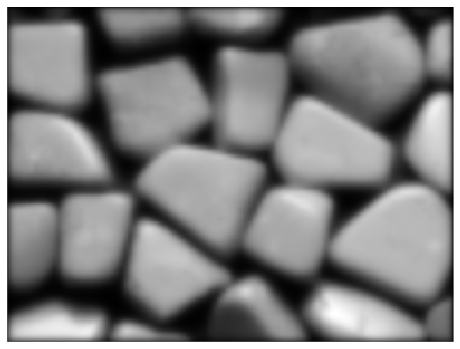

In [16]:
# Se prueba la funcion con un suavizado de 10
suavizado_imagen(corrupta, 10)

Y hemos obtenido el resultado deseado...

## La cereza del pastel

Contentos con nuestros resultados podriamos irnos a descansar, pero aun queda un truco mas. Ya que hemos obtenido una función que ejecuta todo nuestro código, podemos hacer que IPython la ejecute en linea al momento de darle un parametro diferente.

Para esto utilizaremos un Widget de IPython:

In [17]:
# Se importan widgets de IPython para interactuar con la funcion
from IPython.html.widgets import interact, fixed

Dada la función que obtuvimos, ahora solo tenemos que mandar llamar a la función:

```python
interact(funcion_con_codigo,
         parametro_fijo=fixed(param),
         parametro_a_variar=(inicio, fin))
```

<function __main__.suavizado_imagen>

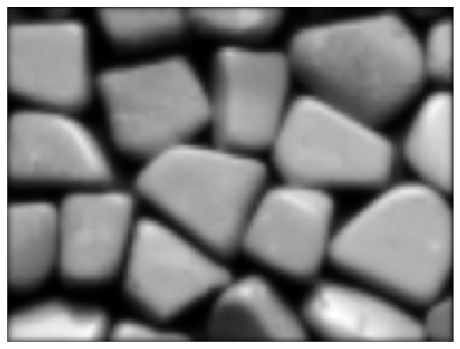

In [18]:
# Se llama a la funcion interactiva
interact(suavizado_imagen, imagen_corrupta=fixed(corrupta), delta=(0.0, 10.0))

Con lo que solo tenemos que mover el deslizador para cambiar ```delta``` y ver los resultados de estos cambios.

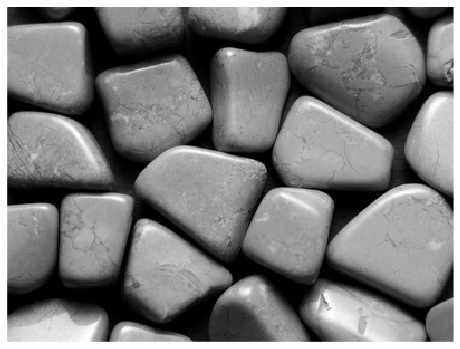

In [19]:
# Se muestra la imagen correcta
im_correcta = imread(correcta)

f  = figure(figsize=(8,6))
ax = imshow(im_correcta, cmap=cm.gray, interpolation='none');

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["right"].set_color("none")
ax.axes.spines["left"].set_color("none")
ax.axes.spines["top"].set_color("none")
ax.axes.spines["bottom"].set_color("none")

Espero te hayas divertido con esta larga explicación y al final sepas un truco mas.

Si deseas compartir este Notebook de IPython utiliza la siguiente dirección:

http://bit.ly/1CJNEBn

o bien el siguiente código QR:

![Codigo](codigos/suave.jpg)

In [20]:
# Codigo para generar codigo :)
from qrcode import make
img = make("http://bit.ly/1CJNEBn")
img.save("codigos/suave.jpg")